## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.647345  1.845306  0.923103  1.355977  0.538842  0.349936
1 -0.585837  1.505404  0.774193 -1.441158 -0.242541 -0.442410
2  1.492309 -0.656322 -1.680755 -1.099772  0.808671  0.567311
3  0.151558  0.003345 -0.059165 -0.116136 -1.489886 -0.488831
4  0.699924  0.053348 -0.451801 -0.146998 -0.979394  0.048346


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9980427	total: 57.5ms	remaining: 57.4s
1:	learn: 0.9887922	total: 58ms	remaining: 29s
2:	learn: 0.9774536	total: 58.5ms	remaining: 19.5s
3:	learn: 0.9662621	total: 59.1ms	remaining: 14.7s
4:	learn: 0.9552433	total: 59.6ms	remaining: 11.9s
5:	learn: 0.9450667	total: 60.1ms	remaining: 9.95s
6:	learn: 0.9348507	total: 60.7ms	remaining: 8.61s
7:	learn: 0.9245980	total: 61.2ms	remaining: 7.59s
8:	learn: 0.9154570	total: 61.7ms	remaining: 6.79s
9:	learn: 0.9064282	total: 62.2ms	remaining: 6.15s
10:	learn: 0.8956797	total: 62.6ms	remaining: 5.63s
11:	learn: 0.8856656	total: 63.1ms	remaining: 5.19s
12:	learn: 0.8764572	total: 63.6ms	remaining: 4.83s
13:	learn: 0.8686852	total: 64ms	remaining: 4.51s
14:	learn: 0.8611852	total: 64.4ms	remaining: 4.23s
15:	learn: 0.8523875	total: 64.8ms	remaining: 3.99s
16:	learn: 0.8445297	total: 65.5ms	remaining: 3.79s
17:	learn: 0.8360860	total: 65.9ms	remaining: 3.59s
18:	learn: 0.8276890	total: 66.4ms	remaining: 3.42

105:	learn: 0.3909185	total: 107ms	remaining: 901ms
106:	learn: 0.3883340	total: 107ms	remaining: 897ms
107:	learn: 0.3852996	total: 108ms	remaining: 892ms
108:	learn: 0.3828293	total: 109ms	remaining: 887ms
109:	learn: 0.3797754	total: 109ms	remaining: 881ms
110:	learn: 0.3770981	total: 109ms	remaining: 875ms
111:	learn: 0.3738949	total: 110ms	remaining: 869ms
112:	learn: 0.3715582	total: 110ms	remaining: 864ms
113:	learn: 0.3686803	total: 111ms	remaining: 859ms
114:	learn: 0.3657696	total: 111ms	remaining: 853ms
115:	learn: 0.3627162	total: 111ms	remaining: 849ms
116:	learn: 0.3600296	total: 112ms	remaining: 845ms
117:	learn: 0.3577995	total: 112ms	remaining: 840ms
118:	learn: 0.3548850	total: 113ms	remaining: 835ms
119:	learn: 0.3526798	total: 113ms	remaining: 831ms
120:	learn: 0.3502212	total: 114ms	remaining: 827ms
121:	learn: 0.3475807	total: 114ms	remaining: 823ms
122:	learn: 0.3452219	total: 115ms	remaining: 818ms
123:	learn: 0.3428767	total: 115ms	remaining: 813ms
124:	learn: 

274:	learn: 0.1265310	total: 186ms	remaining: 492ms
275:	learn: 0.1258085	total: 187ms	remaining: 490ms
276:	learn: 0.1248596	total: 187ms	remaining: 489ms
277:	learn: 0.1242000	total: 188ms	remaining: 488ms
278:	learn: 0.1235604	total: 188ms	remaining: 487ms
279:	learn: 0.1229089	total: 189ms	remaining: 485ms
280:	learn: 0.1221802	total: 189ms	remaining: 484ms
281:	learn: 0.1215299	total: 190ms	remaining: 483ms
282:	learn: 0.1208832	total: 190ms	remaining: 482ms
283:	learn: 0.1200700	total: 191ms	remaining: 480ms
284:	learn: 0.1193617	total: 191ms	remaining: 479ms
285:	learn: 0.1187836	total: 191ms	remaining: 478ms
286:	learn: 0.1180367	total: 192ms	remaining: 477ms
287:	learn: 0.1173050	total: 192ms	remaining: 476ms
288:	learn: 0.1166066	total: 193ms	remaining: 475ms
289:	learn: 0.1159129	total: 194ms	remaining: 475ms
290:	learn: 0.1152951	total: 194ms	remaining: 474ms
291:	learn: 0.1147009	total: 195ms	remaining: 473ms
292:	learn: 0.1139865	total: 195ms	remaining: 472ms
293:	learn: 

489:	learn: 0.0489389	total: 290ms	remaining: 301ms
490:	learn: 0.0487795	total: 290ms	remaining: 301ms
491:	learn: 0.0486870	total: 291ms	remaining: 300ms
492:	learn: 0.0485959	total: 291ms	remaining: 300ms
493:	learn: 0.0483816	total: 292ms	remaining: 299ms
494:	learn: 0.0481728	total: 292ms	remaining: 298ms
495:	learn: 0.0479845	total: 293ms	remaining: 297ms
496:	learn: 0.0478214	total: 293ms	remaining: 297ms
497:	learn: 0.0475681	total: 294ms	remaining: 296ms
498:	learn: 0.0474248	total: 294ms	remaining: 295ms
499:	learn: 0.0472193	total: 294ms	remaining: 294ms
500:	learn: 0.0470017	total: 295ms	remaining: 294ms
501:	learn: 0.0468322	total: 295ms	remaining: 293ms
502:	learn: 0.0467311	total: 296ms	remaining: 292ms
503:	learn: 0.0465767	total: 296ms	remaining: 292ms
504:	learn: 0.0463668	total: 297ms	remaining: 291ms
505:	learn: 0.0462693	total: 297ms	remaining: 290ms
506:	learn: 0.0460645	total: 298ms	remaining: 289ms
507:	learn: 0.0458689	total: 298ms	remaining: 289ms
508:	learn: 

659:	learn: 0.0266739	total: 369ms	remaining: 190ms
660:	learn: 0.0266171	total: 370ms	remaining: 190ms
661:	learn: 0.0265754	total: 370ms	remaining: 189ms
662:	learn: 0.0265020	total: 371ms	remaining: 188ms
663:	learn: 0.0264233	total: 371ms	remaining: 188ms
664:	learn: 0.0263720	total: 372ms	remaining: 187ms
665:	learn: 0.0262954	total: 372ms	remaining: 187ms
666:	learn: 0.0262451	total: 373ms	remaining: 186ms
667:	learn: 0.0261363	total: 373ms	remaining: 185ms
668:	learn: 0.0260437	total: 374ms	remaining: 185ms
669:	learn: 0.0259325	total: 374ms	remaining: 184ms
670:	learn: 0.0258348	total: 374ms	remaining: 184ms
671:	learn: 0.0257392	total: 375ms	remaining: 183ms
672:	learn: 0.0256354	total: 375ms	remaining: 182ms
673:	learn: 0.0255329	total: 376ms	remaining: 182ms
674:	learn: 0.0254061	total: 376ms	remaining: 181ms
675:	learn: 0.0253405	total: 376ms	remaining: 180ms
676:	learn: 0.0252697	total: 377ms	remaining: 180ms
677:	learn: 0.0251709	total: 377ms	remaining: 179ms
678:	learn: 

885:	learn: 0.0148617	total: 473ms	remaining: 60.8ms
886:	learn: 0.0147991	total: 473ms	remaining: 60.3ms
887:	learn: 0.0147570	total: 474ms	remaining: 59.8ms
888:	learn: 0.0147112	total: 474ms	remaining: 59.2ms
889:	learn: 0.0146673	total: 475ms	remaining: 58.7ms
890:	learn: 0.0146572	total: 475ms	remaining: 58.1ms
891:	learn: 0.0146461	total: 476ms	remaining: 57.6ms
892:	learn: 0.0146362	total: 476ms	remaining: 57.1ms
893:	learn: 0.0145753	total: 477ms	remaining: 56.5ms
894:	learn: 0.0145216	total: 477ms	remaining: 56ms
895:	learn: 0.0144793	total: 478ms	remaining: 55.4ms
896:	learn: 0.0144697	total: 478ms	remaining: 54.9ms
897:	learn: 0.0144486	total: 479ms	remaining: 54.4ms
898:	learn: 0.0143888	total: 479ms	remaining: 53.8ms
899:	learn: 0.0143478	total: 480ms	remaining: 53.3ms
900:	learn: 0.0143384	total: 480ms	remaining: 52.8ms
901:	learn: 0.0142764	total: 481ms	remaining: 52.2ms
902:	learn: 0.0142549	total: 481ms	remaining: 51.7ms
903:	learn: 0.0142440	total: 481ms	remaining: 51

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

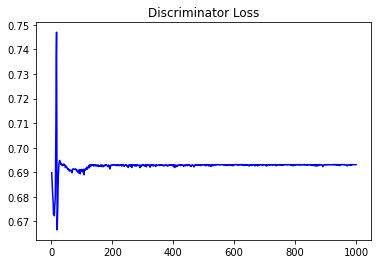

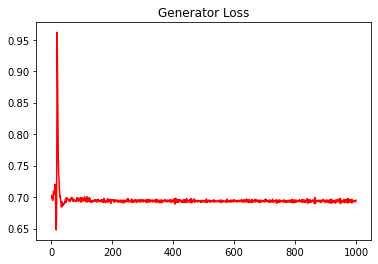

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.11903225418220191


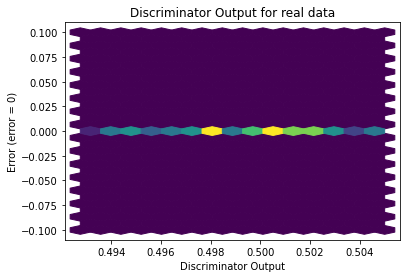

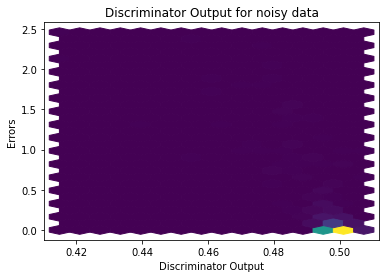

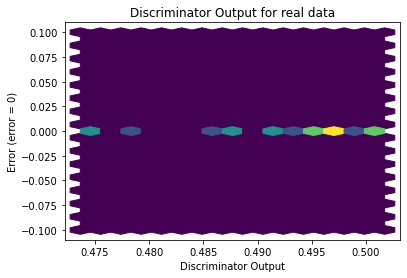

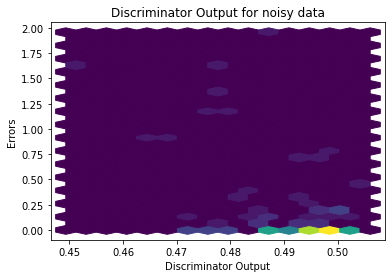

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


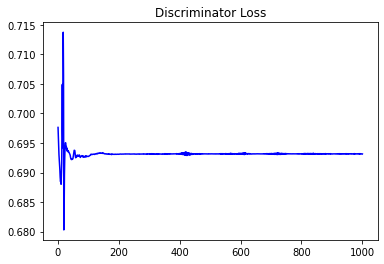

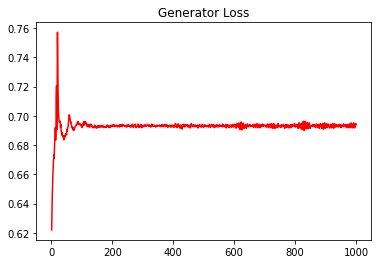

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.10841130650096122


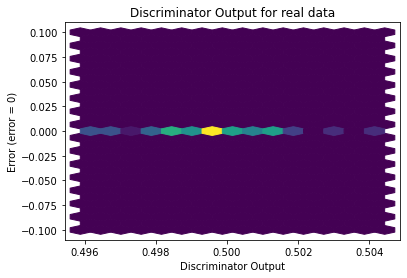

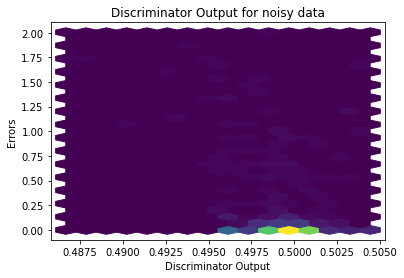

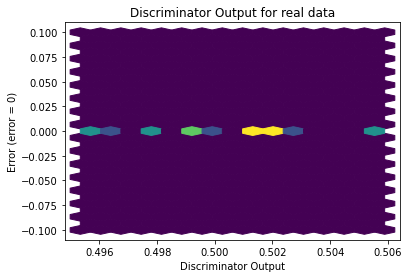

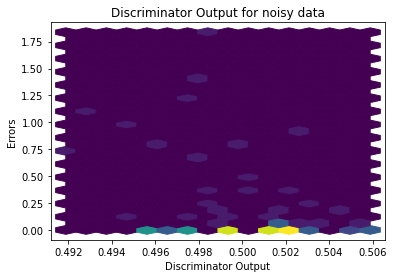

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2430]], requires_grad=True)
